# Long Short-Term Memory (LSTM) Models

*Time-Series Forecasting in Financial Markets*
Many financial institutions use LSTM models for predicting stock prices, cryptocurrency trends, and market volatility. One common approach is using LSTMs to predict the next day’s price based on the last 30 days of stock prices.

Problem: Predict the next day’s closing price for a stock using 30 days of historical data.

Steps:
1. Data Preparation: Stock market data (daily closing prices) is preprocessed to create time-series datasets.
2. Model Implementation: An LSTM model is trained on the prepared data to predict future stock prices.
3. Evaluation: The model is evaluated based on mean squared error (MSE) or mean absolute error (MAE).

Using the NSE data provided.

## Import Libraries and Load Stock Data

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# load the dataset provided
df = pd.read_csv('/content/NSE_SCOM_Safaricom.csv')
print(df.head())

         Date  Open  High   Low  Close    Vol. Change %
0  11-06-2012  3.40  3.45  3.35   3.40   3.24M    0.00%
1  12-06-2012  3.40  3.50  3.40   3.45   6.09M    1.47%
2  13-06-2012  3.45  3.45  3.35   3.40   7.29M   -1.45%
3  14-06-2012  3.40  3.45  3.35   3.40  31.81M    0.00%
4  15-06-2012  3.40  3.50  3.40   3.40   7.57M    0.00%


## Data Preprocessing

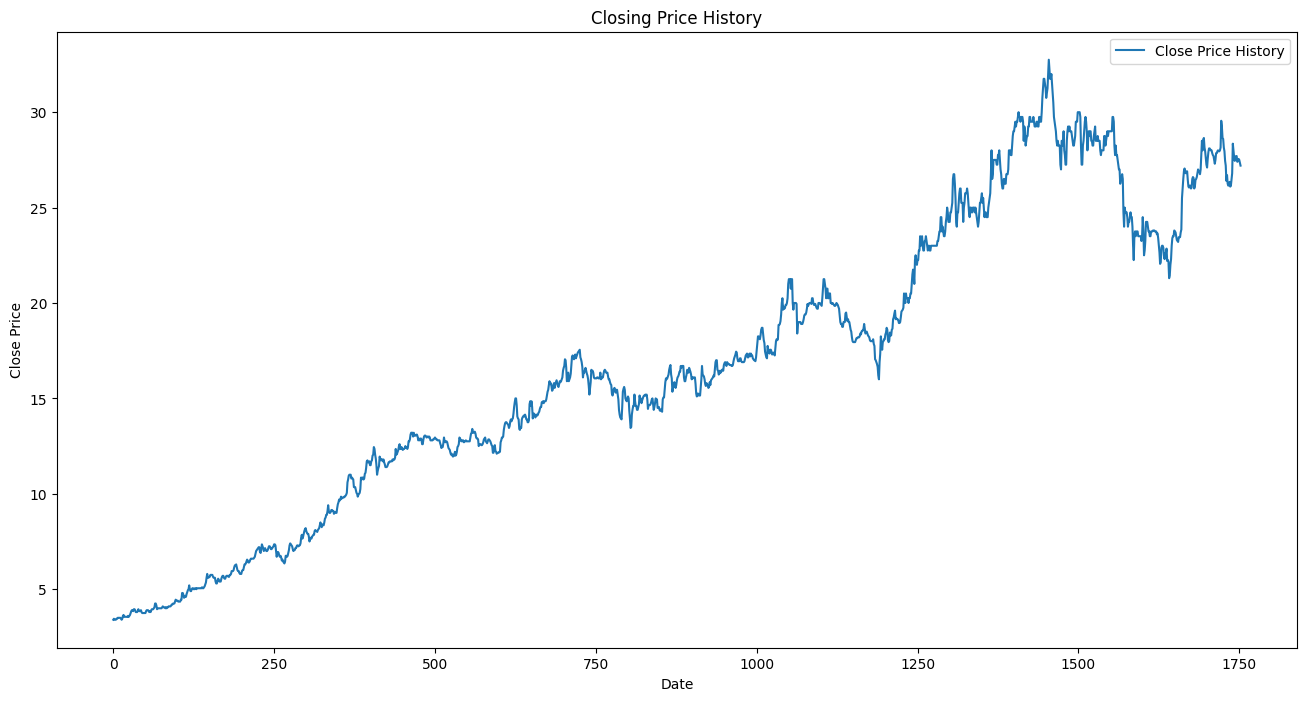

In [ ]:
# Close' price because it is commonly used for stock price prediction.
data = df[['Close']]

# visualize the closing price history
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Close Price History')
plt.title('Closing Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
# use MinMaxScaler to scale the data to be between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# prepare the data for LSTM
X = []
y = []
sequence_length = 60  # use past 60 days to predict the next day
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

In [ ]:
# Convert to numpy arrays
X, y = np.array(X), np.array(y)

In [ ]:
# Reshape X for LSTM input
X = np.reshape(X, (X.shape[0], X.shape[1], 1)) # LSTM expects 3D input: (samples, time_steps, features)

## Build and Train the LSTM Model

In [ ]:
# load libraries for LSTM
import tensorflow as tf
# Use Keras bundled with TensorFlow for compatibility
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
# build the LSTM model
model = Sequential()
# First LSTM layer with Dropout regularisation
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
# Second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# fully connected output layer
model.add(Dense(units=1))

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model
model.fit(X, y, epochs=50, batch_size=32)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.0959
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0040
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0033
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0032
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0031
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0029
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0026
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0032
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0023
Epoch 10/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0024
Epoch 11/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0020
Epoch 12/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0022
Epoch 13/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0021
Epoch 14/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.0020
Epoch 15/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0019
Epoch 16/50
53/

## Predictions and Visualizations

In [ ]:
# predict stock prices
test_data = data.tail(100)  # last 100 days for testing
scaled_test_data = scaler.transform(test_data)
X_test = []
for i in range(sequence_length, len(scaled_test_data)):
    X_test.append(scaled_test_data[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_prices = model.predict(X_test) # make predictions
predicted_prices = scaler.inverse_transform(predicted_prices) # rescale back to original prices

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 404ms/step


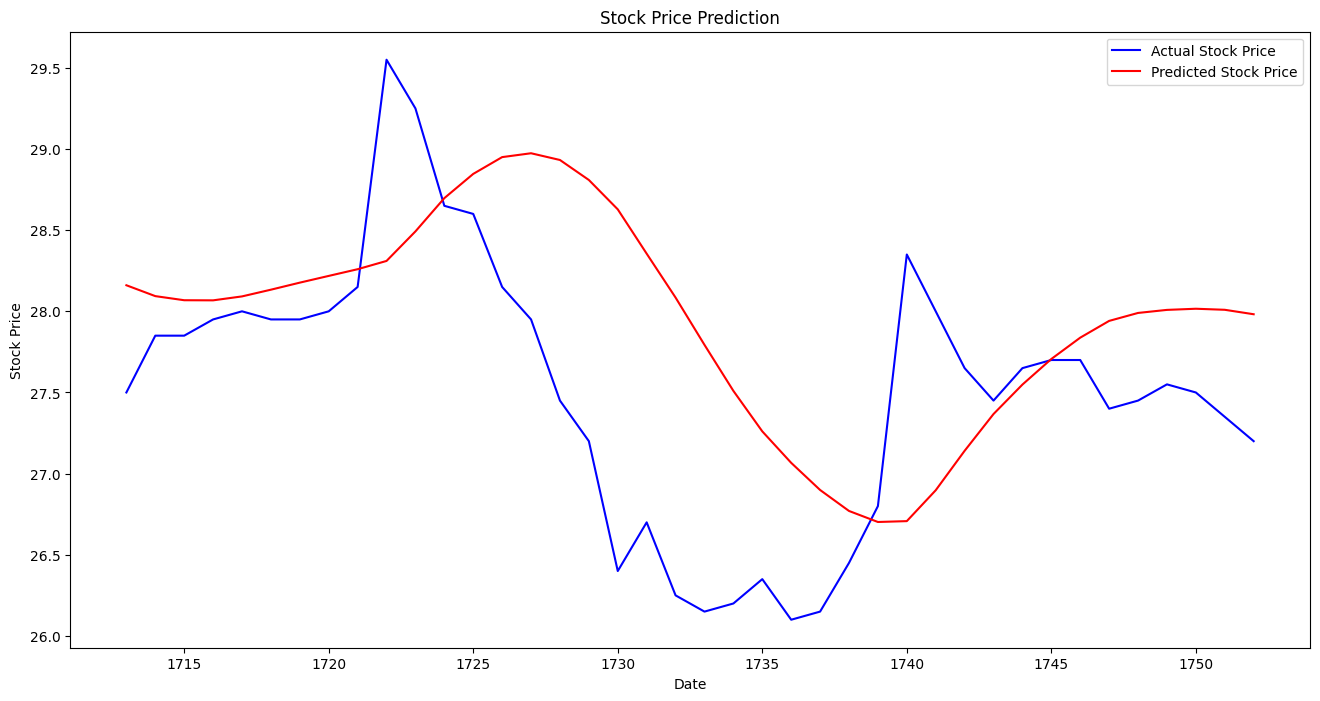

In [ ]:
# visualize the results
plt.figure(figsize=(16,8))
plt.plot(test_data.index[sequence_length:], test_data['Close'][sequence_length:], color='blue', label='Actual Stock Price')
plt.plot(test_data.index[sequence_length:], predicted_prices, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## Model Evaluation
Root Mean Squared Error (RMSE) is used to assess the accuracy of our predictions. A lower RMSE indicates better performance.

In [ ]:
from sklearn.metrics import mean_squared_error

# calculate rmse
rmse = np.sqrt(mean_squared_error(test_data['Close'][sequence_length:], predicted_prices))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 0.9165
